In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [41]:
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")
csv_path = os.path.join(path, "cardio_train.csv")
df = pd.read_csv(csv_path, delimiter=";")

In [42]:
df['age'] = np.ceil(df['age'] / 365.25)

In [43]:
df['bmi'] = df['weight'] / ((df['height']/100)**2) 

# Cardiovascular Disease (CVD)

##  Definition
Cardiovascular disease refers to a group of disorders that **affect the heart and blood vessels**.

It includes conditions such as:
- **Coronary artery disease (CAD)** → blockages in heart arteries
- **Heart attack (myocardial infarction)**
- **Stroke** → blocked or burst blood vessels in the brain
- **High blood pressure (hypertension)**
- **Heart failure** → heart can’t pump blood effectively
- **Arrhythmia** → abnormal heart rhythm

## Causes / Risk Factors
- **Age** → risk increases with age
- **High blood pressure** → damages arteries
- **High cholesterol** → plaque buildup
- **Diabetes / high blood sugar**
- **Obesity / high BMI**
- **Smoking & alcohol consumption**
- **Physical inactivity**
- **Genetics / family history**

## Symptoms
- Chest pain or discomfort
- Shortness of breath
- Fatigue
- Palpitations
- Swelling in legs, ankles

> Some people may have **no symptoms** until a heart attack or stroke occurs.

## Prevention
- Healthy diet (low salt, low sugar, more fruits/vegetables)
- Regular exercise
- Maintain healthy weight & BMI
- Don’t smoke, limit alcohol
- Regular health checkups (BP, cholesterol, blood sugar)


<h3>1. Systolic Blood Pressure (ap_hi)</h3>
It measures the pressure in the arteries when the heart contracts (pumps blood). <br/>
Healthy Range<br/>
Normal: 90–120<br/>
High: > 140 (Hypertension)<br/>
<h3>2. Diastolic Blood Pressure (ap_lo)</h3>
It measures the pressure in the arteries when the heart relaxes between beats. <br/>
Healthy Range<br/>
Normal: 60–80<br/>
High: > 90<br/>
<h3>pulse_pressure</h3>
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo'] <br/>
High Pressure Higher Risk


In [44]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['high_bp'] = ((df['ap_hi'] > 140) | (df['ap_lo'] > 90)).astype(int) 

In [45]:
print("min:", df["ap_hi"].min())
print("max:", df["ap_hi"].max())

min: -150
max: 16020


<h2>Removing Outliers that are impossible in values like</h2>
ap_hi must be 70–250<br>
ap_lo must be 40–150<br>
ap_hi > ap_lo (systolic must be higher than diastolic) <br>

In [46]:
df = df[
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 150) &
    (df['ap_hi'] > df['ap_lo'])
]
df = df[(df['height'] >= 140) & (df['height'] <= 200)]
df = df[(df['weight'] >= 40) & (df['weight'] <= 160)]
df['bmi'] = df['bmi'].clip(15, 50)


In [47]:
df = df.drop(['id'], axis=1 ,errors='ignore')

In [48]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,high_bp
count,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000,68443.000000
mean,53.790731,1.348801,164.466286,74.096759,126.679850,81.308958,1.364888,1.225677,0.088073,0.053358,0.803384,0.494806,27.421432,45.370893,0.151644
std,6.762937,0.476594,7.791671,14.109211,16.673715,9.417608,0.679072,0.571528,0.283404,0.224749,0.397443,0.499977,5.112352,11.660965,0.358679
min,30.000000,1.000000,140.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,40.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494,40.000000,0.000000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213,50.000000,0.000000
max,65.000000,2.000000,198.000000,160.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.000000,140.000000,1.000000


In [49]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,high_bp
0,51.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30,0
1,56.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50,0
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60,0
3,49.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68443 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             68443 non-null  float64
 1   gender          68443 non-null  int64  
 2   height          68443 non-null  int64  
 3   weight          68443 non-null  float64
 4   ap_hi           68443 non-null  int64  
 5   ap_lo           68443 non-null  int64  
 6   cholesterol     68443 non-null  int64  
 7   gluc            68443 non-null  int64  
 8   smoke           68443 non-null  int64  
 9   alco            68443 non-null  int64  
 10  active          68443 non-null  int64  
 11  cardio          68443 non-null  int64  
 12  bmi             68443 non-null  float64
 13  pulse_pressure  68443 non-null  int64  
 14  high_bp         68443 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 8.4 MB


In [51]:
df.isnull().sum()

age               0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
bmi               0
pulse_pressure    0
high_bp           0
dtype: int64

In [52]:
corr = df.corr(numeric_only=True)
# corr[corr >= 0.5]
corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,high_bp
age,1.000000,-0.023024,-0.086330,0.057801,0.209597,0.156708,0.155186,0.099142,-0.047641,-0.028740,-0.010546,0.239457,0.106394,0.173136,0.113600
gender,-0.023024,1.000000,0.523839,0.156847,0.062047,0.067307,-0.036837,-0.021273,0.338955,0.171213,0.005925,0.006959,-0.113763,0.034360,0.031778
height,-0.086330,0.523839,1.000000,0.310203,0.017052,0.034871,-0.056926,-0.021170,0.197199,0.098054,-0.010008,-0.013237,-0.197891,-0.003781,-0.014338
weight,0.057801,0.156847,0.310203,1.000000,0.272411,0.255414,0.142529,0.108246,0.067976,0.067114,-0.018448,0.181302,0.865741,0.183236,0.179710
ap_hi,0.209597,0.062047,0.017052,0.272411,1.000000,0.734672,0.195239,0.094168,0.027571,0.035746,-0.001290,0.428190,0.272101,0.836540,0.732375
ap_lo,0.156708,0.067307,0.034871,0.255414,0.734672,1.000000,0.161512,0.074623,0.024966,0.037143,-0.000915,0.340735,0.245407,0.242871,0.562587
cholesterol,0.155186,-0.036837,-0.056926,0.142529,0.195239,0.161512,1.000000,0.450362,0.010056,0.035080,0.008515,0.221355,0.175833,0.148727,0.124283
gluc,0.099142,-0.021273,-0.021170,0.108246,0.094168,0.074623,0.450362,1.000000,-0.005807,0.009990,-0.008109,0.089288,0.121611,0.074382,0.055858
smoke,-0.047641,0.338955,0.197199,0.067976,0.027571,0.024966,0.010056,-0.005807,1.000000,0.340726,0.025062,-0.016363,-0.033593,0.019260,0.018670
alco,-0.028740,0.171213,0.098054,0.067114,0.035746,0.037143,0.035080,0.009990,0.340726,1.000000,0.024543,-0.008326,0.017185,0.021115,0.027948


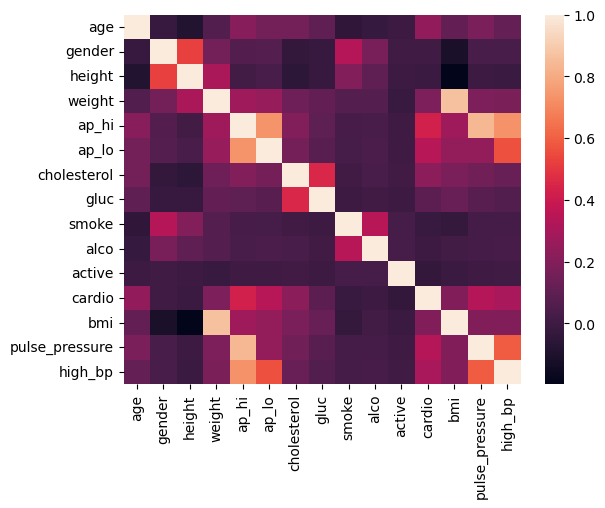

In [53]:
sns.heatmap(corr)
plt.show()

In [54]:
corr["cardio"].sort_values(ascending=False)

cardio            1.000000
ap_hi             0.428190
ap_lo             0.340735
pulse_pressure    0.337075
high_bp           0.299371
age               0.239457
cholesterol       0.221355
bmi               0.193539
weight            0.181302
gluc              0.089288
gender            0.006959
alco             -0.008326
height           -0.013237
smoke            -0.016363
active           -0.037749
Name: cardio, dtype: float64

In [55]:
df.shape

(68443, 15)

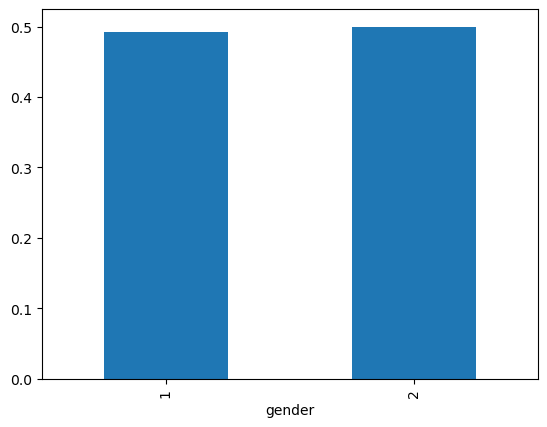

In [56]:
df.groupby('gender')['cardio'].mean().plot(kind='bar')
plt.show()

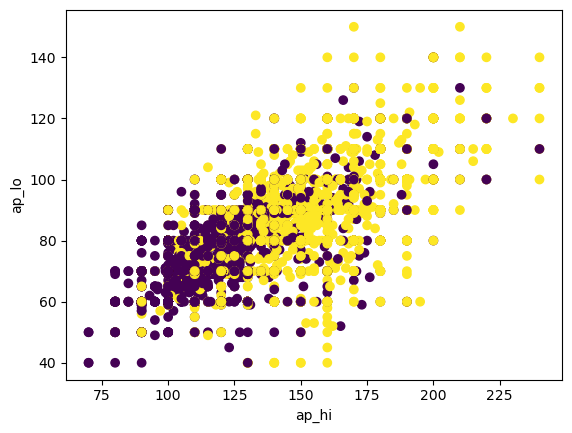

In [57]:
plt.scatter(df['ap_hi'], df['ap_lo'], c=df['cardio'])
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')
plt.show()

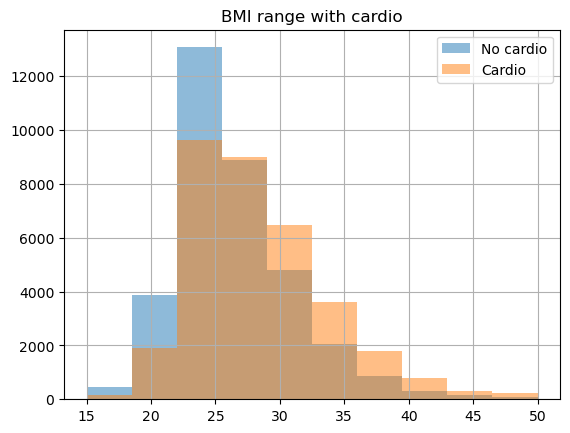

In [58]:
df[df['cardio']==0]['bmi'].hist(alpha=0.5, label='No cardio')
df[df['cardio']==1]['bmi'].hist(alpha=0.5, label='Cardio')
plt.title("BMI range with cardio")
plt.legend()
plt.show()

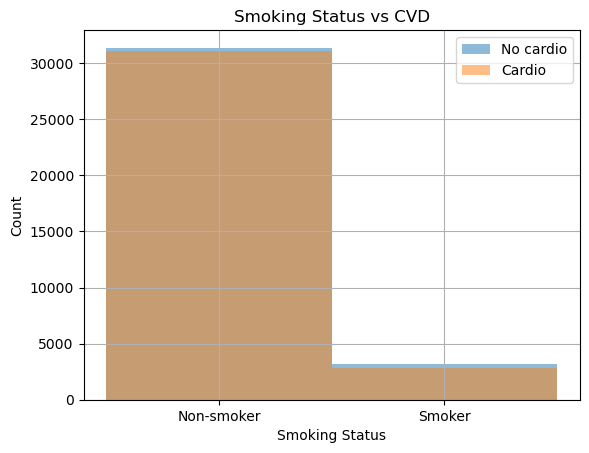

In [59]:
df[df['cardio']==0]['smoke'].hist(bins=[-0.5,0.5,1.5], alpha=0.5, label='No cardio')
df[df['cardio']==1]['smoke'].hist(bins=[-0.5,0.5,1.5], alpha=0.5, label='Cardio')
plt.xticks([0,1], ['Non-smoker','Smoker'])
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Smoking Status vs CVD")
plt.legend()
plt.show()

In [60]:
smoke_counts = df.groupby(['cardio', 'smoke']).size()
print(smoke_counts)

cardio  smoke
0       0        31373
        1         3204
1       0        31042
        1         2824
dtype: int64


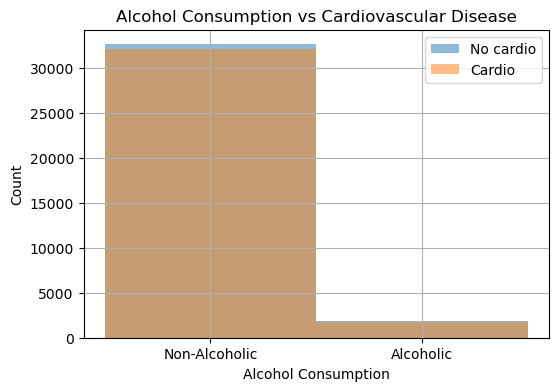

In [61]:
plt.figure(figsize=(6,4))
df[df['cardio']==0]['alco'].hist(bins=[-0.5,0.5,1.5], alpha=0.5, label='No cardio')
df[df['cardio']==1]['alco'].hist(bins=[-0.5,0.5,1.5], alpha=0.5, label='Cardio')
plt.xticks([0,1], ['Non-Alcoholic','Alcoholic'])
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.title("Alcohol Consumption vs Cardiovascular Disease")
plt.legend()
plt.show()

In [62]:
alco_counts = df.groupby(['cardio', 'alco']).size()
print(alco_counts)

cardio  alco
0       0       32668
        1        1909
1       0       32123
        1        1743
dtype: int64
